In [74]:
# Model design
import agentpy as ap

In [75]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import agentpy as ap

Archivo: /content/parameters/params_5_5__1.json
money: 4
step cost: 1
position: [1, 4]


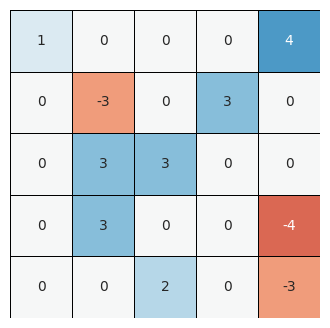

Archivo: /content/parameters/params_8_8__3.json
money: 4
step cost: 1
position: [4, 4]


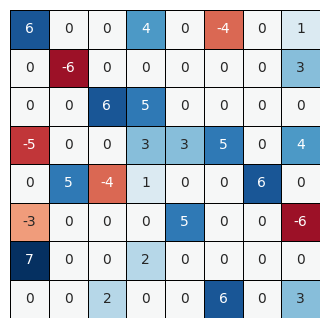

Archivo: /content/parameters/params_5_5__3.json
money: 3
step cost: 1
position: [1, 2]


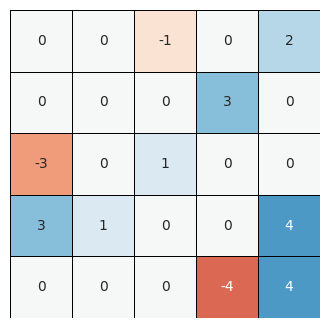

Archivo: /content/parameters/params1.json
money: 60
step cost: 10
position: [0, 3]


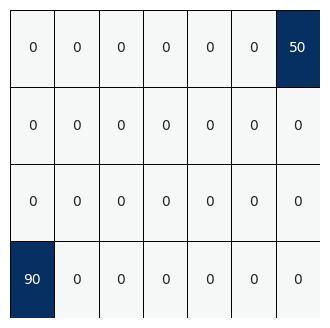

Archivo: /content/parameters/params_10_10__2.json
money: 6
step cost: 1
position: [1, 1]


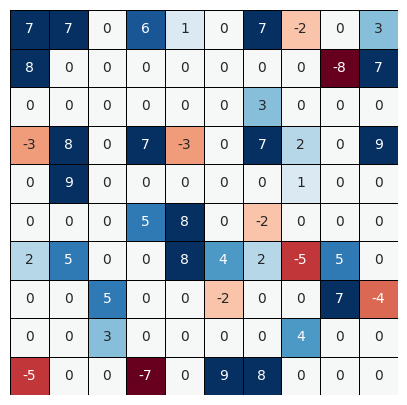

Archivo: /content/parameters/params5.json
money: 1
step cost: 1
position: [0, 5]


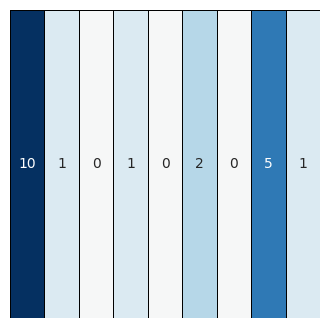

Archivo: /content/parameters/params_8_8__1.json
money: 6
step cost: 1
position: [5, 4]


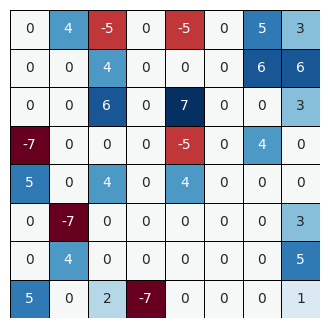

Archivo: /content/parameters/params_4_4__2.json
money: 2
step cost: 1
position: [3, 1]


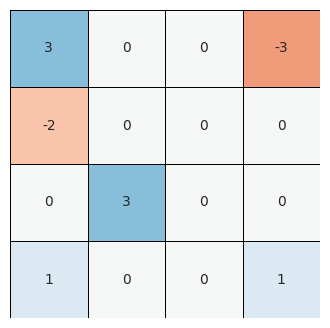

Archivo: /content/parameters/params_4_4__4.json
money: 3
step cost: 1
position: [2, 3]


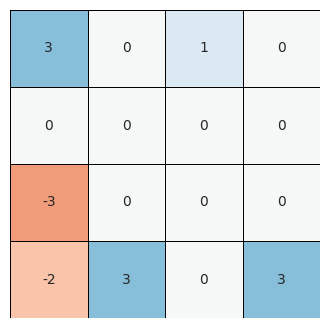

Archivo: /content/parameters/params_4_10__2.json
money: 7
step cost: 1
position: [3, 0]


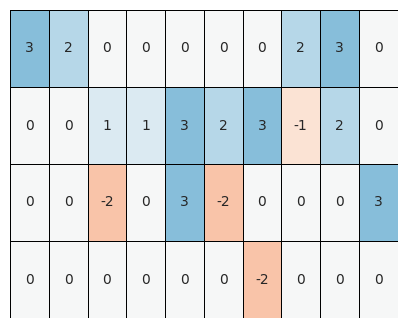

Archivo: /content/parameters/params2.json
money: 4
step cost: 1
position: [0, 0]


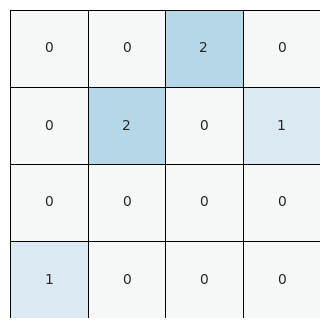

Archivo: /content/parameters/params_5_5__2.json
money: 3
step cost: 1
position: [2, 0]


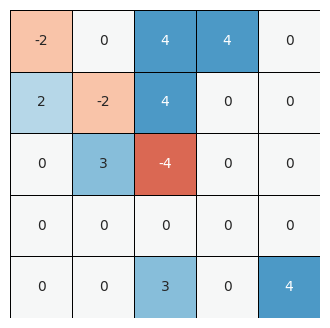

Archivo: /content/parameters/params_5_5__4.json
money: 2
step cost: 1
position: [3, 1]


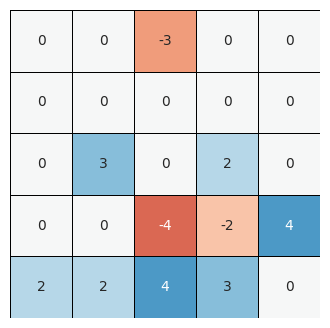

Archivo: /content/parameters/params_4_4__1.json
money: 3
step cost: 1
position: [1, 3]


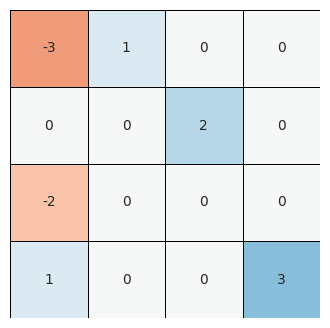

Archivo: /content/parameters/params_8_8__4.json
money: 5
step cost: 1
position: [2, 6]


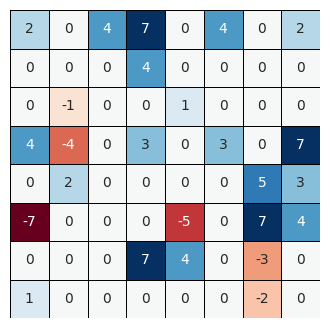

Archivo: /content/parameters/params_10_10__1.json
money: 5
step cost: 1
position: [9, 0]


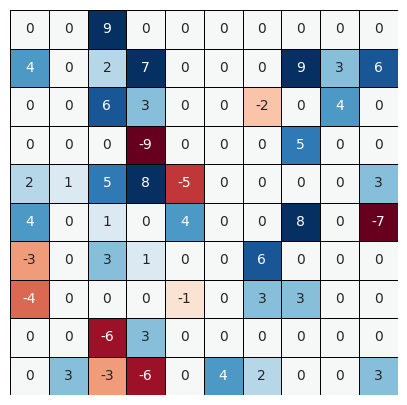

Archivo: /content/parameters/params_10_10__3.json
money: 8
step cost: 1
position: [4, 9]


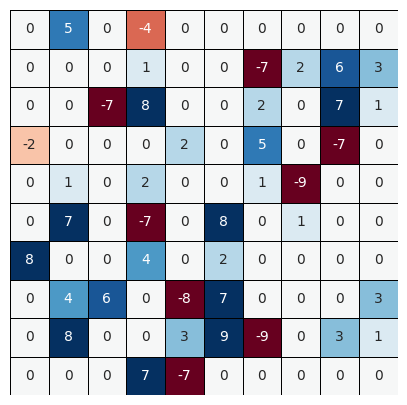

Archivo: /content/parameters/params4.json
money: 1
step cost: 1
position: [0, 4]


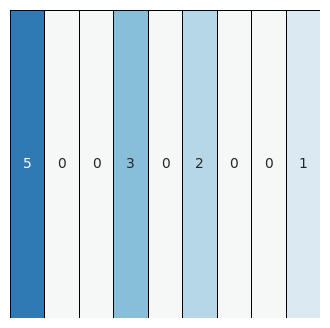

Archivo: /content/parameters/params_4_4__3.json
money: 3
step cost: 1
position: [1, 2]


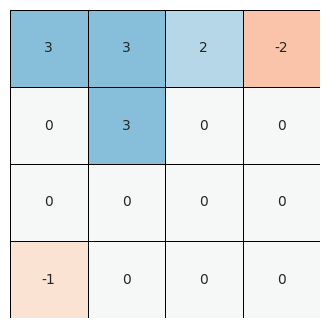

Archivo: /content/parameters/params3.json
money: 6
step cost: 1
position: [4, 4]


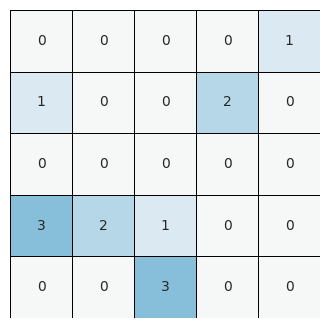

Archivo: /content/parameters/params_10_10__4.json
money: 8
step cost: 1
position: [2, 6]


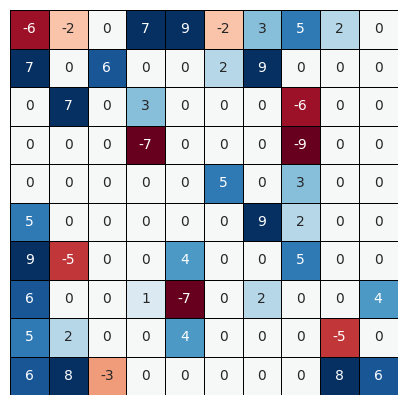

Archivo: /content/parameters/params_4_8__1.json
money: 7
step cost: 1
position: [1, 4]


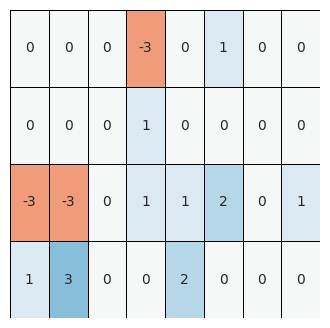

Archivo: /content/parameters/params_4_10__3.json
money: 6
step cost: 1
position: [2, 3]


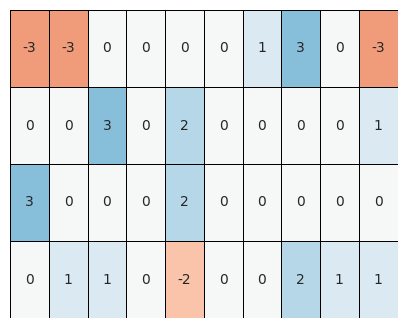

Archivo: /content/parameters/params_4_8__3.json
money: 5
step cost: 1
position: [3, 6]


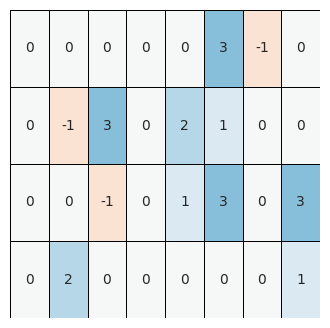

Archivo: /content/parameters/params_8_8__2.json
money: 6
step cost: 1
position: [2, 7]


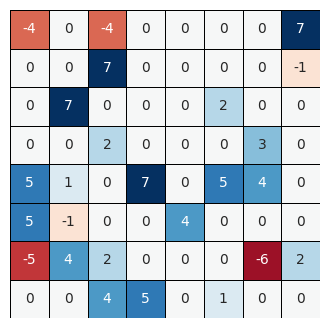

Archivo: /content/parameters/params_4_8__2.json
money: 6
step cost: 1
position: [2, 4]


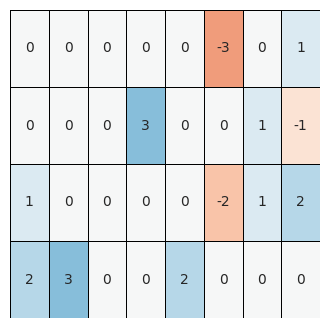

Archivo: /content/parameters/params_4_10__4.json
money: 6
step cost: 1
position: [1, 8]


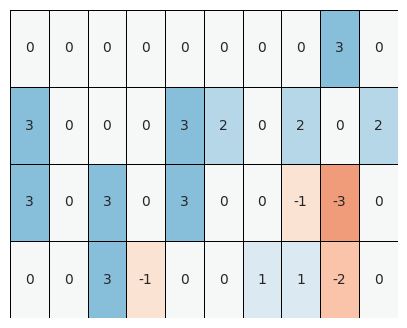

Archivo: /content/parameters/params_4_10__1.json
money: 8
step cost: 1
position: [2, 4]


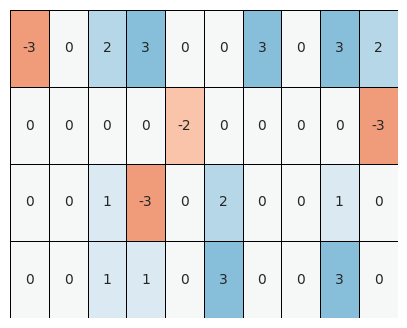

Archivo: /content/parameters/params_4_8__4.json
money: 7
step cost: 1
position: [2, 0]


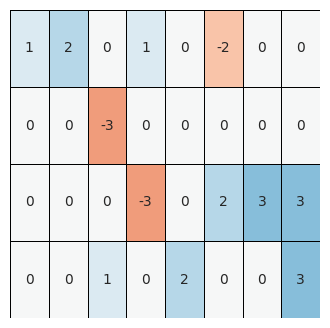

Total de archivos leídos: 29


In [76]:
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob

# Cargar todos los archivos JSON en la carpeta 'parameters'
file_paths = glob.glob('/content/parameters/*.json')

# Contador de archivos procesados
total_files = len(file_paths)

# Recorrer cada archivo y visualizar la información
for file_path in file_paths:
    with open(file_path, 'r') as f:
        parameters = json.load(f)

    # Extraer los datos
    state, money, step_cost, position = [parameters[key] for key in ['state', 'money', 'step_cost', 'position']]
    h, w = np.array(state).shape

    # Establecer un tamaño mínimo de figura para evitar el error
    fig_width = max(w // 2, 4)  # Mínimo de 4 unidades de ancho
    fig_height = max(h // 2, 4)  # Mínimo de 4 unidades de alto
    plt.rcParams['figure.figsize'] = [fig_width, fig_height]

    # Mostrar los parámetros básicos
    print(f'Archivo: {file_path}')
    print('money:', money)
    print('step cost:', step_cost)
    print('position:', position)

    # Visualizar la habitación
    ax = sns.heatmap(state, linewidth=0.5, linecolor='black', annot=True, cmap='RdBu', cbar=False, vmin=-7, vmax=7)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Imprimir el número total de archivos procesados
print(f"Total de archivos leídos: {total_files}")


In [77]:
class Room:
    def __init__(self, grid):
        self.grid = np.array(grid)
        self.rows, self.cols = self.grid.shape

    def get_reward(self, position):
        reward = self.grid[position]
        self.grid[position] = 0  # Limpiar la celda después de que el robot pasa sobre ella
        return reward


In [78]:
class Robot:
    def __init__(self, room, initial_position, energy, step_cost):
        self.room = room
        self.position = tuple(initial_position)
        self.energy = energy
        self.step_cost = step_cost
        self.collected_rewards = 0
        self.steps = 0

    def move(self, new_position):
        if self.energy >= self.step_cost:
            reward = self.room.get_reward(new_position)
            self.collected_rewards += reward
            self.energy -= self.step_cost
            self.position = new_position
            self.steps += 1
        else:
            print("El robot se ha quedado sin energía.")

    def get_possible_moves(self):
        row, col = self.position
        moves = []
        if row > 0:
            moves.append((row - 1, col))  # Arriba
        if row < self.room.rows - 1:
            moves.append((row + 1, col))  # Abajo
        if col > 0:
            moves.append((row, col - 1))  # Izquierda
        if col < self.room.cols - 1:
            moves.append((row, col + 1))  # Derecha
        return moves


In [79]:
import random

# Estrategia 1: Movimiento aleatorio
def random_walk(robot):
    possible_moves = robot.get_possible_moves()
    if possible_moves:
        next_move = random.choice(possible_moves)  # Cambiado a random.choice
        robot.move(next_move)


# Estrategia 2: Selección de la celda con mayor recompensa
def move_to_max_reward(robot):
    possible_moves = robot.get_possible_moves()
    if possible_moves:
        max_reward_move = max(possible_moves, key=lambda move: robot.room.grid[move])
        robot.move(max_reward_move)

# Estrategia 3: Moverse hacia la celda con la recompensa más cercana
def move_to_nearest_reward(robot):
    possible_moves = robot.get_possible_moves()
    reward_moves = [(move, robot.room.grid[move]) for move in possible_moves if robot.room.grid[move] > 0]
    if reward_moves:
        nearest_reward_move = min(reward_moves, key=lambda x: abs(x[1]))[0]
        robot.move(nearest_reward_move)
    else:
        random_walk(robot)  # Si no hay recompensa cerca, camina al azar


In [80]:
def run_experiment(strategy, parameters):
    room = Room(parameters['state'])
    robot = Robot(room, parameters['position'], parameters['money'], parameters['step_cost'])

    while robot.energy > 0 and np.any(room.grid > 0):
        strategy(robot)

    return robot.collected_rewards, robot.steps, robot.energy

# Ejecución de estrategias para todos los archivos JSON
results = {
    "random_walk": [],
    "move_to_max_reward": [],
    "move_to_nearest_reward": []
}

for params in all_parameters:
    for strategy in [random_walk, move_to_max_reward, move_to_nearest_reward]:
        rewards, steps, remaining_energy = run_experiment(strategy, params)
        results[strategy.__name__].append((rewards, steps, remaining_energy))

# Mostrar resultados
for strategy, result in results.items():
    print(f"Resultados para {strategy}:")
    for res in result:
        print(f"Recompensas: {res[0]}, Pasos: {res[1]}, Energía restante: {res[2]}")


Resultados para random_walk:
Recompensas: 4.0, Pasos: 4, Energía restante: 0
Recompensas: -3.0, Pasos: 4, Energía restante: 0
Recompensas: 0.0, Pasos: 3, Energía restante: 0
Recompensas: 0, Pasos: 6, Energía restante: 0
Recompensas: 14.0, Pasos: 6, Energía restante: 0
Recompensas: 0, Pasos: 1, Energía restante: 0
Recompensas: 0.0, Pasos: 6, Energía restante: 0
Recompensas: 0.0, Pasos: 2, Energía restante: 0
Recompensas: 0.0, Pasos: 3, Energía restante: 0
Recompensas: 0.0, Pasos: 7, Energía restante: 0
Recompensas: 0, Pasos: 4, Energía restante: 0
Recompensas: 0.0, Pasos: 3, Energía restante: 0
Recompensas: 3.0, Pasos: 2, Energía restante: 0
Recompensas: 2.0, Pasos: 3, Energía restante: 0
Recompensas: 0.0, Pasos: 5, Energía restante: 0
Recompensas: -7.0, Pasos: 5, Energía restante: 0
Recompensas: 8.0, Pasos: 8, Energía restante: 0
Recompensas: 2, Pasos: 1, Energía restante: 0
Recompensas: 0.0, Pasos: 3, Energía restante: 0
Recompensas: 6.0, Pasos: 6, Energía restante: 0
Recompensas: -6.

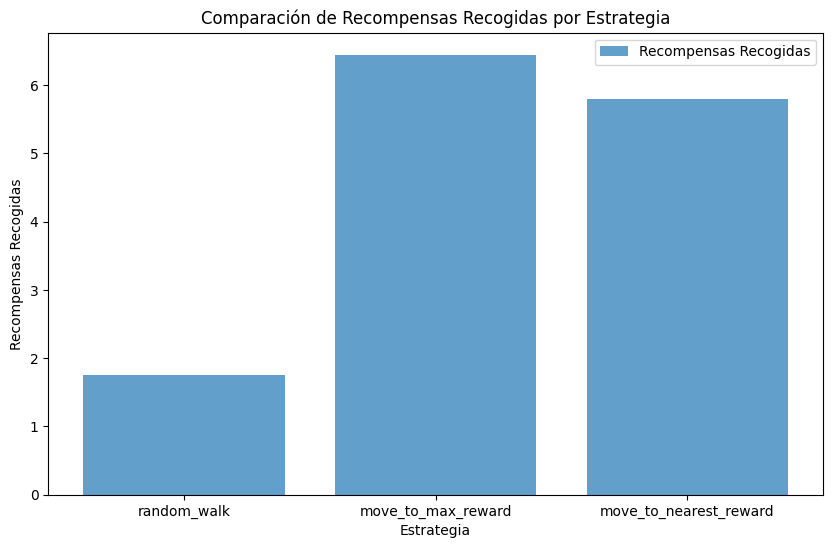

In [81]:
# Graficar resultados
strategies = list(results.keys())
rewards = [np.mean([res[0] for res in results[strategy]]) for strategy in strategies]
steps = [np.mean([res[1] for res in results[strategy]]) for strategy in strategies]
energy_left = [np.mean([res[2] for res in results[strategy]]) for strategy in strategies]

plt.figure(figsize=(10, 6))
plt.bar(strategies, rewards, alpha=0.7, label="Recompensas Recogidas")
plt.xlabel("Estrategia")
plt.ylabel("Recompensas Recogidas")
plt.title("Comparación de Recompensas Recogidas por Estrategia")
plt.legend()
plt.show()
